Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


Load Dataset

In [2]:
df = pd.read_csv('Cardio.csv')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

#Empty values in each column

In [5]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.isnull().values.any()

False

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#Number of  patients with cardiovascular disease and ones without 

In [8]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

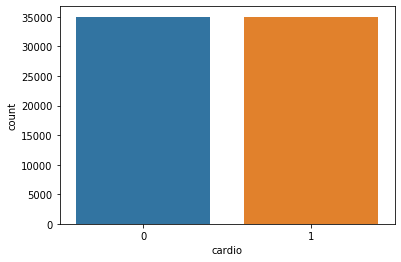

In [9]:
# Visualise 
sns.countplot(df['cardio'])

In [10]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
#Compare the cardiovascular disease number 
#look years column
df['years'] = (df['age'] / 365).round(0)
df['years'] = pd.to_numeric( df['years'], downcast= 'integer')


In [12]:
df.drop(columns='age', inplace=True)

In [13]:
#Applying one hot encoder on the categorical feature(age)

enc=OneHotEncoder()
enc.fit_transform(df['gender'].reshape(1,-1))


AttributeError: 'Series' object has no attribute 'reshape'

In [14]:
df['gender'].shape

(70000,)

In [15]:
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,1,156,56.0,100,60,1,1,0,0,0,0,48


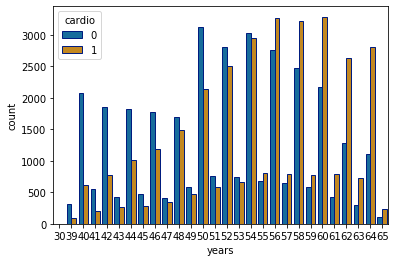

In [16]:
sns.countplot(x='years',hue='cardio',data=df,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))

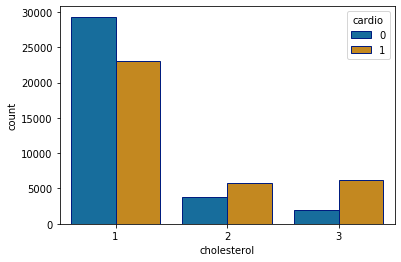

In [17]:
sns.countplot(x='cholesterol',hue='cardio',data=df,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))

In [18]:
#correlation of the columns 
df.corr()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
gender,0.003502,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884
alco,0.001210,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,-0.029918


# Visualise the data 

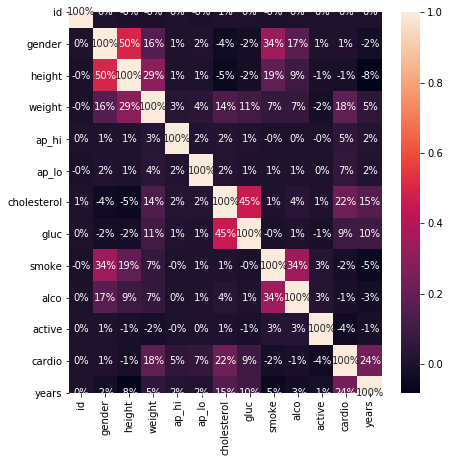

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True, fmt='.0%', linewidths=0, )

In [20]:
df

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,53
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,62
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61


In [21]:
#drop id column 
df = df.drop('id', axis=1)

Split the Data into feature data and target data

In [23]:
y = df['Cardio']
x=df.drop(columns='cardio')

KeyError: 'Cardio'

In [24]:
#Split data in 75% training data and 25% test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=1)


In [25]:
#To standardize the features...

from sklearn.preprocessing import StandardScaler

std=StandardScaler()
std.fit(x_train)
std.transform(x_test)

array([[-0.73462899, -1.38251267,  1.29610208, ..., -0.23931996,
         0.49648558, -1.37737024],
       [-0.73462899, -0.89677042,  1.01930053, ..., -0.23931996,
         0.49648558, -1.96806356],
       [-0.73462899,  0.0747141 , -0.57230841, ..., -0.23931996,
         0.49648558,  0.09936305],
       ...,
       [ 1.36123134,  0.92476305, -0.43390763, ..., -0.23931996,
         0.49648558,  0.39470971],
       [ 1.36123134,  0.43902079, -0.29550685, ...,  4.17850639,
         0.49648558,  1.13307636],
       [-0.73462899, -0.77533485, -1.12591152, ..., -0.23931996,
         0.49648558, -1.6727169 ]])

In [32]:
#Libraries used 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score , roc_auc_score
from sklearn import svm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


ModuleNotFoundError: No module named 'xgboost'

In [30]:
def base_func(element):
    #train and fit the model
    model = element()
    model.fit(x_train , y_train)
    
    #predict
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    
    #evaluation
    train_accuracy = roc_auc_score(y_train , train_preds)
    test_accuracy = roc_auc_score(y_test , test_preds)
    
    print(str(element))
    print("--------------------------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100) :.4}%")
    print(f"Test Accuracy : {(test_accuracy * 100) :.4}%")
    
    #Store accuracy in a new DataFrame
    score_logreg = [element , train_accuracy , test_accuracy]
    models = pd.DataFrame([score_logreg])    

In [31]:
##Five algorithms used
algorithms = [LogisticRegression , KNeighborsClassifier , RandomForestClassifier , XGBClassifier ,svm.SVC]

#running each model and print accuracy scores
for element in algorithms:
    base_func(element)

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
def grd_src(classifier , param_grid):
  param_grid = param_grid
  
  #Instantiate the tuned random forest model
  grid_search = GridSearchCV(classifier, param_grid, cv=3, n_jobs=-1)
  
  #train the tuned random forest model
  grid_search.fit(x_train , y_train)

  #print best paramets during the grid search
  print((str(classifier) + "Best Parameters"))
  print("-----------------------------------")
  print(grid_search.best_params_)
  return grid_search.best_params_

In [ ]:
##Grid Search for best parameters of RandomForestClassifier
param_grid_rf = {"n_estimators" : [10,15,20,21,22],
                 "criterion" : ["gini" , "entropy"],
                 "max_depth" : [8,9,10,11],
                 "min_samples_split" : [1,2,3,4,5,6,7]}

rf_params = grd_src(RandomForestClassifier() , param_grid_rf)                 

In [ ]:
#GridSearch for best parameters of XGBClassifier
param_grid_xgb = {"n_estimators" : [120,100,90,80,60,],
                  "learning_rate" : [0.01,0.1,0.2] , 
                  "max_depth" : [2,3,4,5],
                  "colsample_by_tree" : [0,0.02],
                  "gamma":[0,0.01,0.1,0.2]}

grd_src(XGBClassifier() , param_grid_xgb)

In [ ]:
#Run models with their best parameters and also print accuracy scores

from sklearn import metrics
def run_model(model, x_train, y_train,x_test, y_test ):
    model.fit(x_train, y_train)

    # predict
    train_preds = model.predict_proba(x_train).argmax(1)
    test_preds = model.predict_proba(x_test).argmax(1)

    

    fpr, tpr, threshold = metrics.roc_curve(y_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

    # evaluate
    train_auc = roc_auc_score(y_train, train_preds)
    test_auc = roc_auc_score(y_test, test_preds)
    report = classification_report(y_test, test_preds)

    print(metrics.confusion_matrix(y_test, test_preds))

    test_preds[test_preds>roc_auc]= 1
    test_preds[test_preds<=roc_auc]= 0

    #print reports of the model accuracy
       print('Model Scores')
    print("------------------------")
    print(f"Training AUC: {(train_auc * 100):.4}%")
    print(f"Test AUC:     {(test_auc * 100):.4}%")
    print("------------------------------------------------------")
    print('Classification Report : \n', report)
    return test_preds

In [ ]:
#Random forest with best parameters
#{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 20}
rf_model=RandomForestClassifier(n_estimators=20, 
                                  criterion= 'gini', 
                                  max_depth= 9, 
                                  min_samples_split= 5)
rfc_cv_score = cross_val_score(rf_model, x, y, cv=3, scoring='roc_auc')

                               
                               
run_model(rf_model, x_train, y_train, x_test, y_test)

In [ ]:
##Xg boost with the best parameters
#{'colsample_by_tree': 0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 80}


xgb_model = XGBClassifier(colsample_by_tree = 0 , n_estimators = 80
                          , gamma = 0.2 , learning_rate = 0.2 , 
                          max_depth = 4)


run_model(xgb_model , x_train , y_train , x_test , y_test)
xgb_cv_score = cross_val_score(xgb_model, x, y, cv=3, scoring='roc_auc')